<a href="https://colab.research.google.com/github/sharad22253/cie-2/blob/main/cie_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/train.csv')
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    object  
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(6)
memory usage: 80.7+ KB


In [16]:
import statistics
age_mean=df['age'].mean()
age_median=df['age'].median()
age_mode=statistics.mode(df['age'])
fare_mean=df['fare'].mean()
fare_median=df['fare'].median()
fare_mode=statistics.mode(df['fare'])
print("Mean of age is :",age_mean)
print("Median of age is :",age_median)
print("Mode value of age is :",age_mode)
print("Mean value of fare is :",fare_mean)
print("Median of Fare is :",fare_median)
print("Mode value of fare is :",fare_mode)


Mean of age is : 29.69911764705882
Median of age is : 28.0
Mode value of age is : 24.0
Mean value of fare is : 32.204207968574636
Median of Fare is : 14.4542
Mode value of fare is : 8.05


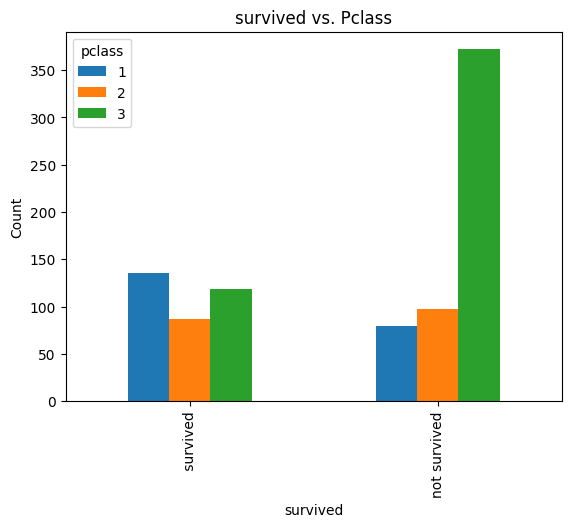

In [17]:
import matplotlib.pyplot as plt
df['survived'].replace({0:'not survived',1:' survived'},inplace= True)
survived_pclass_count = df.groupby(['survived', 'pclass']).size().unstack()
survived_pclass_count.plot(kind='bar')
plt.title('survived vs. Pclass')
plt.xlabel('survived')
plt.ylabel('Count')
plt.show()

In [6]:
import pandas as pd
import seaborn as sns
df=sns.load_dataset('titanic')
sd=df.isnull().sum()
print("before",sd)
do=df.select_dtypes(include=['number']).mean()
dd=df.fillna(do)
sd1=dd.isnull().sum()
print("after",sd1)

before survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
after survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


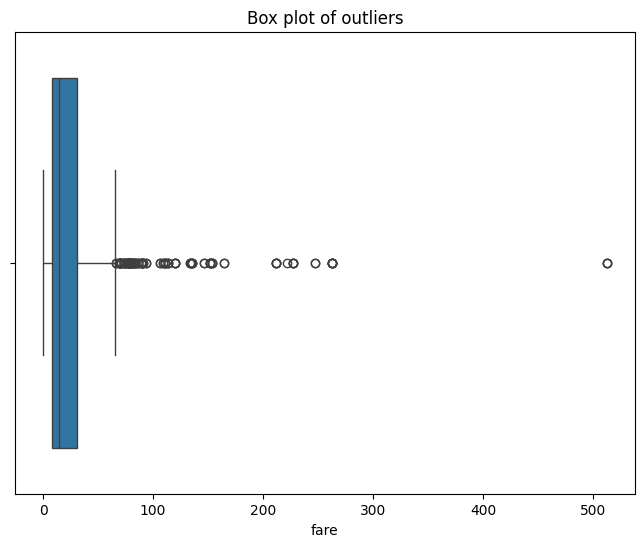

Outliers are :
         survived  pclass     sex   age  sibsp  parch      fare embarked  \
27   not survived       1    male  19.0      3      2  263.0000        S   
88       survived       1  female  23.0      3      2  263.0000        S   
118  not survived       1    male  24.0      0      1  247.5208        C   
258      survived       1  female  35.0      0      0  512.3292        C   
299      survived       1  female  50.0      0      1  247.5208        C   
311      survived       1  female  18.0      2      2  262.3750        C   
341      survived       1  female  24.0      3      2  263.0000        S   
377  not survived       1    male  27.0      0      2  211.5000        C   
380      survived       1  female  42.0      0      0  227.5250        C   
438  not survived       1    male  64.0      1      4  263.0000        S   
527  not survived       1    male   NaN      0      0  221.7792        S   
557  not survived       1    male   NaN      0      0  227.5250        C 

In [14]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(x=df['fare'])
plt.title("Box plot of outliers")
plt.show()
zscore=stats.zscore(df['fare'])
threshold=3
zscore_outliers=df[abs(zscore)>threshold]
print("Outliers are :")
print(zscore_outliers)